# <p style="text-align: center;">EE 380L: Data Mining</p>
# <p style="text-align: center;">Assignment 5</p>
## <p style="text-align: center;">Total points: 50 </p>
## <p style="text-align: center;">Due: Tuesday, Apr. 18, submitted via Canvas by 11:59pm</p>


Your homework should be written in a **Jupyter notebook**. You may work in teams of two if you wish. Only one student per team needs to submit the assignment on Canvas. But be sure to include name and UTID for both students.  Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting.

# Question 1: Ensembles (3+3+3+3=12pts)
In this problem we are going to analyze the breast cancer dataset to predict whether or not an individual suffers from diabetes.  We will be using decision tree classifier with and without the meta methods – Bagging and Boosting. You are free to use either Python or R (take your pick) for this problem.

Use the following code to import the breast cancer dataset.
The dataset consists of 30 features and one target variable.

In [1]:
from sklearn import datasets
diabetes = datasets.load_breast_cancer()
X = diabetes.data
y = diabetes.target

Use the following code to split the data into training and test set using [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with **random state 20** and **test_size = 0.33**.  Note that the random_state parameter is different from HW2.

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=20)

If you decided to use R, uncomment the below code and generate the .csv files to use in R.

In [3]:
#np.savetxt("X_train.csv", X_train, delimiter=",")
#np.savetxt("X_test.csv", X_test, delimiter=",")
#np.savetxt("y_train.csv", y_train, delimiter=",")
#np.savetxt("y_test.csv", y_test, delimiter=",")

(a) Fit a classification tree. Plot the tree, and report the mean error rate (fraction of incorrect labels) on test data. Report the confusion matrix. You can use rpart in R to fit the decision tree. In python, use the scikit learn’s tree package.

(b) Apply the random forest classifier to this dataset. Mention any design choices (with reasoning/justification) that you made, e.g. number of trees used, and number of features considered for each tree. Report the mean error rate and the confusion matrix.

(c) Use gradient boosted decision tree (gbdt) to classify the data. Again, you should mention any design choices that you made.  You can use gbm package in R. Report the mean error rate and the confusion matrix.


For random forests and gradient boosted decision trees in python, use scikit learn’s ensemble package.
In R, you can use randomForest and gbm packages.

Show the error rates (misclassification rate) obtained from these three models in a table. **How do these
models compare in terms of the misclassification rate?**

# Question 2: Data Exploration and Regression Analysis (3+3+3+3+3=15pts)

Consider the dataset provided (Boston.csv) which has been slightly modified from the original "Boston Housing" data set. This dataset records properties of 510 housing zones in the Greater Boston area.


(a) Generate box-plots of the LSTAT (% of lower status in the population) and MEDVDerived (median home value) attributes and identify the cutoff values for outliers. Generate a scatterplot of MEDV against LSTAT; comment on how inclusion of the outliers would affect a predictive model of median home value as a function of % of lower status in the population. (Hint: Such effects may be easier to visualize if the outliers are in a different color or symbol than the other data.)

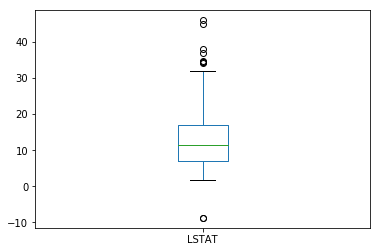

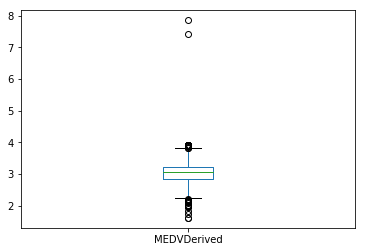

Cutoff Values for LSTAT: < 1.73 and > 31.99
Cutoff Values for Median Price: < 2.2513 and > 3.8022


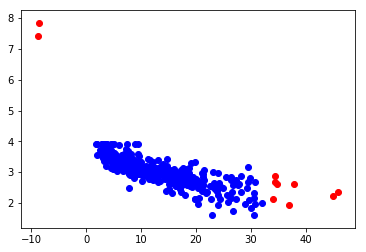

In [92]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


filename = './Boston.csv'
data = pd.read_csv(filename)
X = data.ix[:,'LSTAT':] # get all features, ignore row id column

plt.figure();
lstat_boxData = X.boxplot(column='LSTAT', grid=0, return_type = 'dict')
plt.show();

plt.figure(); 
med_boxData = X.boxplot(column='MEDVDerived', grid=0, return_type = 'dict')
plt.show();

ls_cutoffs = np.sort([caps.get_ydata()[0] for caps in lstat_boxData['caps']])
med_cutoffs = np.sort([caps.get_ydata()[0] for caps in med_boxData['caps']])

print "Cutoff Values for LSTAT: < {0:.5} and > {1:.5}".format(ls_cutoffs[0], ls_cutoffs[1])
print "Cutoff Values for Median Price: < {0:.5} and > {1:.5}".format(med_cutoffs[0], med_cutoffs[1])

# plot outliers and data
plt.figure();
for elem, value in enumerate(X['LSTAT']):
    if X['LSTAT'][elem] < ls_cutoffs[0] or X['LSTAT'][elem] > ls_cutoffs[1]:
        plt.scatter(X['LSTAT'][elem], X['MEDVDerived'][elem], color='red')                     
    elif X['MEDVDerived'][elem] < med_cutoffs[0] or X['MEDVDerived'][elem] > med_cutoffs[1]:
        plt.scatter(X['LSTAT'][elem], X['MEDVDerived'][elem], color='blue')
    else:
        plt.scatter(X['LSTAT'][elem], X['MEDVDerived'][elem], color='blue')
plt.show()


### The prediction of median home prices will be highly skewed if the % of lower status in the population is below 0. The model would predict that the value is 2x-4x higher than what it realistically is. 

(b) Let us try to fit an MLR, using ordinary least squares, to this dataset with MEDVDerived as the dependent variable. Keep the first 350 records as a training set (call it Bostrain) which you will use to fit the model; the remaining 160 will be used as a test set (Bostest). 
Use only the following variables (expressed in “R” form for convenience) in your model:
MEDVDerived ∼ LSTAT + RM + CHAS + INDUS + TAX + RAD + BLACK.  Report the RMSE obtained on both Bostrain and Bostest. How much does this increase when you score your model on Bostest?

In [100]:
from sklearn import linear_model

# split data into training and test set
Bostrain_X = data.ix[0:349,'LSTAT':'BLACK']
Bostrain_Y = data.ix[0:349,'MEDVDerived']
print np.shape(Bostrain_X), np.shape(Bostrain_Y)

Bostest_X = data.ix[350:,'LSTAT':'BLACK']
Bostest_Y = data.ix[350:,'MEDVDerived']
print np.shape(Bostest_X), np.shape(Bostest_Y)

regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(Bostrain_X, Bostrain_Y)

MSE_train = np.mean((regr.predict(Bostrain_X) - Bostrain_Y) ** 2)
MSE_test = np.mean((regr.predict(Bostest_X) - Bostest_Y) ** 2)

print("MLR Mean squared error on Bostrain: {0:.5}".format(MSE_train))
print("MLR Mean squared error on Bostest: {0:.5}".format(MSE_test))

print("MLR MSE on test is {0:.5} times WORSE than the MSE on training".format(MSE_test/MSE_train))


(350, 7) (350,)
(160, 7) (160,)
MLR Mean squared error on Bostrain: 0.070286
MLR Mean squared error on Bostest: 0.36403
MLR MSE on test is 5.1793 times WORSE than the MSE on training


(c) Try to predict ”MEDVDerived” using a robust regression using Huber loss.  You can use the [sklearn package](  http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html).  Set regularization parameter alpha to 0.0 and all other parameters as default.
Report RMSE obtained on both Bostrain and Bostest.

In [97]:
from sklearn.linear_model import HuberRegressor

huber = HuberRegressor(alpha=0.0)
huber.fit(Bostrain_X, Bostrain_Y)

MSE_train = np.mean((huber.predict(Bostrain_X) - Bostrain_Y) ** 2)
MSE_test = np.mean((huber.predict(Bostest_X) - Bostest_Y) ** 2)

print("Huber mean squared error on Bostrain: {0:.5}".format(MSE_train))
print("Huber mean squared error on Bostest: {0:.5}".format(MSE_test))

print("Huber MSE on test is {0:.5} times BETTER than the Huber MSE on training".format(MSE_train/MSE_test))

Huber mean squared error on Bostrain: 0.53454
Huber mean squared error on Bostest: 0.21803
Huber MSE on test is 2.4516 times BETTER than the Huber MSE on training


(d) Try to predict ”MEDVDerived” using a Multi-layer Perceptron (MLP) regression.  Use following parameter settings for MLPRegressor:

    activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,
    batch_size=40, learning_rate_init = 0.005, hidden_layer_sizes = (2,)
    
Instead of fitting a model on original data, use StandardScaler to make each feature centered ([Example](http://scikit-learn.org/stable/auto_examples/applications/plot_prediction_latency.html#sphx-glr-auto-examples-applications-plot-prediction-latency-py)). Whenever you have training and test data, fit a scaler on training data and use this scaler on test data. Here, scale only features (independent variables), not target variable y.  Report the RMSE obtained on both Bostrain and Bostest.

In [106]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

# scale features
X_scaler = StandardScaler()
Bostrain_X_scale = X_scaler.fit_transform(Bostrain_X)
Bostest_X_scale = X_scaler.transform(Bostest_X)

# setup MLP regression model
MLP = MLPRegressor(activation = 'tanh', solver = 'sgd', learning_rate='constant', random_state=42,
batch_size=40, learning_rate_init = 0.005, hidden_layer_sizes = (2,))

MLP.fit(Bostrain_X_scale, Bostrain_Y)

RMSE_train = np.sqrt(np.mean((MLP.predict(Bostrain_X_scale) - Bostrain_Y) ** 2))
RMSE_test = np.sqrt(np.mean((MLP.predict(Bostest_X_scale) - Bostest_Y) ** 2))

print("MLP RMSE on Bostrain: {0:.5}".format(RMSE_train))
print("MLP RMSE on Bostest: {0:.5}".format(RMSE_test))

MLP RMSE on Bostrain: 0.30916
MLP RMSE on Bostest: 0.50651


(e) Compare and comment on the model fits (plot actual vs. predicted values) obtained in (b), (c), and (d). How do outliers affect the relative performance of ordinary least squares regression, robust regression with Huber loss, and MLP?

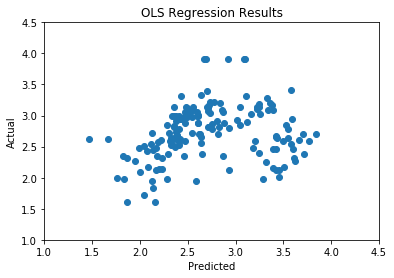

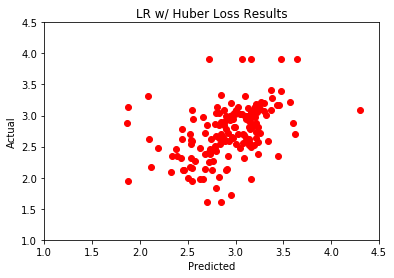

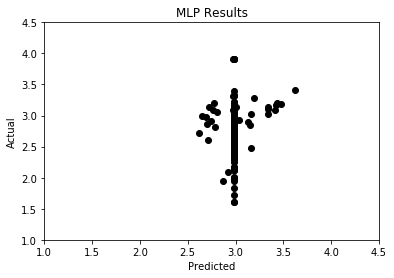

In [129]:
plt.figure();
plt.scatter(regr.predict(Bostest_X), Bostest_Y)
plt.title('OLS Regression Results'); plt.xlabel('Predicted'); plt.ylabel('Actual'); 
plt.axis([1,4.5, 1,4.5]); plt.show();

plt.figure();
plt.scatter(huber.predict(Bostest_X), Bostest_Y,color='red')
plt.title('LR w/ Huber Loss Results'); plt.xlabel('Predicted'); plt.ylabel('Actual'); 
plt.axis([1,4.5, 1,4.5]); plt.show();

plt.figure();
plt.scatter(MLP.predict(Bostest_X_scale), Bostest_Y,color='black')
plt.title('MLP Results'); plt.xlabel('Predicted'); plt.ylabel('Actual'); 
plt.axis([1,4.5, 1,4.5]); plt.show();

| Model | Test MSE | Training MSE
|---|---|
|   OLS Regression  | 0.36403 | 0.070286 |
|   LR w/ Huber Loss  | 0.21803 | 0.53454 |
|   MLP  | 0.50651 | 0.30916|

### For a good model, the data points to lie on the 45 degree diagonal on the plots above (i.e. actual = predicted value).  For the OLS Regression, the outliers are artifically underestimating the actual values of the home prices. This result is reflected in the poor test score.  This trend is observed by the concave parabolic trend fo the data plot. The huber loss function better deals with the outliers, as shown by the lower MSE compared to the OLS regression. For the robust regression with huber loss, the outliers have less of an effect, since we have a scattering 45 degree diagonal trend on the plot. WHAT IS GOING ON WITH THE MLP RESULTS. 

# Question 3 - Sampling (4+4=8pts)

1. CBS has come up with an extreme TV show, and each of its viewers either likes or hates it. (no middle ground here; we are in a “black and white age”). CBS wants to estimate what fraction p of its audience like the show by “randomly” calling n viewers and tallying their responses so as to estimate the true value of p to a fractional accuracy of within ±ε%, with a confidence of (1 − α) × 100%. For α = 0.05, ε = 0.02 (i.e. your answer will be pˆ ± 0.02), what is the minimum value of n needed if (i) true value p = 0.25 and (ii) p = 0.75?

2. Suppose for a certain value of p and choice of ε, you calculate that you will need 1000 samples for α = 0.05. You now decide to obtain a more accurate answer by either (i) reducing α to 0.01, keeping the same ε or by (ii) reducing ε by a factor of 3 from the original value, but maintaining α = 0.1. In each case how many samples would you need now?

# Question 4 - Bias-variance Trandeoff (2pts)
How does the choice of K in the K-nearest neighbor classifier reflect a bias-variance tradeoff?

### The choice of K in KNN vastly impacts the final classification. For large K, the classification of a new point is highly deterministic due to the large number of neighbors that have to be considered (i.e. high bias). This makes the the boundaries between data points well defined (i.e. low variance). For small K, the boundaries are more fluid depending on what metric is used to determine it. For example, take K = 2. We can use the midpoint of the Elucidean distance between two points to determine the classification boundary for one instance. For another model, we may choose to weight the data points closer to the axis more and thus bias the boundary more towards this point. These two models, although with K=2, will yield different results. Thus, for small K, we will obtain a high variance, low bias model.



# Question 5 - Feature Selection (2pts)
Briefly explain what you understand by these two  methods for selecting a subset of features for a supervised learning problem: (i) forward selection and (ii) backward selection (no more than 1 paragraph).

# Question 6 - Eigenfaces (4+3+4=11pts)

In this question, you will explore an application of PCA in image analysis. This question requires images.tar.gz from Canvas. This archive contains 400 images in .pgm format taken from http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html. The images can be read into python as matrices using the steps: Coding guidelines below are only for convenience and you can use any other alternatives within python that provide the same functionality, if available.

To load a given image (e.g. ‘1.pgm’) as a matrix (grey scale representation of the image) and display it, use the following code snippet :

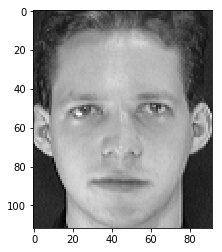

In [4]:
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
import os
%matplotlib inline

img_path = os.getcwd()+'/images/'
img = misc.imread(img_path + '1.pgm')
plt.imshow(img, cmap=plt.cm.gray)

Each image matrix is of size 112 × 92. Vectorize the matrix for each image, and concatenate all image vectors to form a big 400 × 10304 data matrix. For example, to convert ‘img’ to its vector form ‘img vec’, use the following:

In [5]:
img_vec = img.flatten()

To stack all images into a matrix, use numpy’s ‘vstack’ function. The following command will append the array ‘img_vec’ to the matrix ‘img_mat’. Note that you have to first initialize an empy ‘img mat’ with 10304 columns and 0 rows.

In [6]:
img_width, img_height = np.shape(img)
img_mat = np.zeros((0,img_width*img_height))
img_mat = np.vstack((img_mat, img_vec))

Each face can be represented as weighted sum of canonical matrices called eigenfaces. You will project the data matrix onto lower dimensions and see how inclusion of directions in decreasing order of importance according to data spread impacts the quality of the image.

(a) Perform PCA using the sklearn [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) package.  Create i) a scree plot depicting the proportion of variance and ii) a cumulative proportion of variance explained by the first 50 principal components of the img_mat data.  Refer to Figure 10.4 of JW for an example.  You may use the output attribute *explained variance ratio*. 

(b) How many principal components (N1, N2, N3) are required to explain cumulative variance of 20%, 50%, and 80%, respectively?

(c) Reconstruct your original matrix using the number of principal components (N1, N2, N3) you derived in question (b).  Then, pick any one image and plot.  Note that you first want to reshape your vectorized image using the ‘reshape’ command in numpy:

In [7]:
# rec_img = np.reshape(rec_mat[n,:], (img_width,img_height))

Here ‘rec_mat’ is your recovered image matrix using only top-k principal components. (should be of dimension 400 × 10304) and you want to convert the nth vector to an image of the original size (img width = 112 and img height = 92).
You can plot an image matrix using the following function (pylab library should be loaded).

In [8]:
# import pylab
# pylab.figure()
# pylab.imshow(rec_img, cmap=plt.cm.gray)
# pylab.show()